In [53]:
## Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import requests

In [47]:
address = 'Vancouver, Canada'
geolocator = Nominatim(user_agent="anduleh2")
location = geolocator.geocode(address)
vancity_latitude = location.latitude
vancity_longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,vancity_latitude, vancity_longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


In [48]:
df = pd.read_csv('ftp://webftp.vancouver.ca/OpenData/csv/cov_localareas.csv')

In [430]:
new_data = pd.read_csv('ftp://webftp.vancouver.ca/opendata/csv/CensusLocalAreaProfiles2016.csv',encoding='ISO-8859-1')
new_data = new_data.iloc[3:]
new_data.columns = new_data.iloc[0]
new_data = new_data.iloc[1:]
new_data.dropna(inplace=True)
new_data = new_data[new_data['Variable'].str.contains("Average")]
new_data.drop('ID',axis=1,inplace=True)
new_data.set_index('Variable',inplace=True)
new_data = new_data.T
new_data['Neighbourhood'] = new_data.index.str.strip()
new_data

Variable                  Average age of the population  \
3                                                         
Arbutus-Ridge                                      44.6   
Downtown                                           40.6   
Dunbar-Southlands                                  41.1   
Fairview                                           43.4   
Grandview-Woodland                                 40.2   
Hastings-Sunrise                                   42.3   
Kensington-Cedar Cottage                             40   
Kerrisdale                                         42.9   
Killarney                                          42.4   
Kitsilano                                          40.6   
Marpole                                            41.9   
Mount Pleasant                                     38.3   
Oakridge                                           44.3   
Renfrew-Collingwood                                41.2   
Riley Park                                         40.2   
Shaughnessy                                        43.8   
South Cambie                                       42.1   
Strathcona                                         47.3   
Sunset                                             39.8   
Victoria-Fraserview                                43.7   
West End                                           42.8   
West Point Grey                                    42.1   
Vancouver CSD                                      41.6   
Vancouver CMA                                        41   

Variable                    Average age of males   Average age of females  \
3                                                                           
Arbutus-Ridge                               42.2                     46.5   
Downtown                                    41.1                     40.1   
Dunbar-Southlands                           40.1                       42   
Fairview                                    42.1                     44.5   
Grandview-Woodland                          39.8                     40.5   
Hastings-Sunrise                            41.4                     43.2   
Kensington-Cedar Cottage                    39.1                     40.8   
Kerrisdale                                  41.7                       44   
Killarney                                   40.8                     43.8   
Kitsilano                                   39.9                     41.2   
Marpole                                     40.5                     43.3   
Mount Pleasant                              38.1                     38.5   
Oakridge                                    42.5                     45.8   
Renfrew-Collingwood                         39.9                     42.3   
Riley Park                                  39.2                     41.1   
Shaughnessy                                 42.9                     44.6   
South Cambie                                40.6                     43.4   
Strathcona                                  47.8                     46.7   
Sunset                                      38.6                       41   
Victoria-Fraserview                         42.3                     45.1   
West End                                    42.9                     42.7   
West Point Grey                             41.2                     42.9   
Vancouver CSD                               40.8                     42.3   
Vancouver CMA                               40.1                     41.9   

Variable                  Average size of census families  \
3                                                           
Arbutus-Ridge                                         2.9   
Downtown                                              2.4   
Dunbar-Southlands                                       3   
Fairview                                              2.4   
Grandview-Woodland                                    2.6   
Hastings-Sunrise                   

In [49]:
clean_df = df.rename({'NAME':'Neighbourhood'}, axis='columns').drop('MAPID',axis=1)
clean_df['Latitude'] = ''
clean_df['Longitude'] = ''
for i, row in clean_df.iterrows():
    address_iter = '{}, Vancouver, Canada'.format(row['Neighbourhood'])
    location = geolocator.geocode(address_iter)
    clean_df.at[i,'Latitude'] = location.latitude
    clean_df.at[i,'Longitude'] =location.longitude

In [429]:
clean_df

Neighbourhood Latitude Longitude
0                     Sunset  49.2196   -123.09
1             Mount Pleasant  49.2633  -123.097
2                 Riley Park  49.2474  -123.103
3                   Downtown  49.2834  -123.117
4                  Kitsilano  49.2694  -123.155
5          Dunbar-Southlands  49.2535  -123.185
6                 Kerrisdale  49.2347  -123.155
7              Arbutus-Ridge   49.241  -123.167
8            West Point Grey  49.2645  -123.185
9                    Marpole  49.2092  -123.136
10                  Oakridge  49.2308  -123.131
11               Shaughnessy  49.2519  -123.138
12                  Fairview  49.2641  -123.127
13              South Cambie  49.2467  -123.121
14                  West End  49.2841  -123.132
15                 Killarney  49.2243  -123.046
16       Renfrew-Collingwood   49.242  -123.058
17          Hastings-Sunrise  49.2776  -123.044
18       Victoria-Fraserview  49.2184  -123.073
19  Kensington-Cedar Cottage  49.2476  -123.084
20                Strathcona  49.2796   -123.09
21        Grandview-Woodland  49.2706  -123.068

In [432]:
clean_df = pd.merge(clean_df, new_data, on='Neighbourhood')

clean_df

Neighbourhood Latitude Longitude Average age of the population  \
0                     Sunset  49.2196   -123.09                          39.8   
1             Mount Pleasant  49.2633  -123.097                          38.3   
2                 Riley Park  49.2474  -123.103                          40.2   
3                   Downtown  49.2834  -123.117                          40.6   
4                  Kitsilano  49.2694  -123.155                          40.6   
5          Dunbar-Southlands  49.2535  -123.185                          41.1   
6                 Kerrisdale  49.2347  -123.155                          42.9   
7              Arbutus-Ridge   49.241  -123.167                          44.6   
8            West Point Grey  49.2645  -123.185                          42.1   
9                    Marpole  49.2092  -123.136                          41.9   
10                  Oakridge  49.2308  -123.131                          44.3   
11               Shaughnessy  49.2519  -123.138                          43.8   
12                  Fairview  49.2641  -123.127                          43.4   
13              South Cambie  49.2467  -123.121                          42.1   
14                  West End  49.2841  -123.132                          42.8   
15                 Killarney  49.2243  -123.046                          42.4   
16       Renfrew-Collingwood   49.242  -123.058                          41.2   
17          Hastings-Sunrise  49.2776  -123.044                          42.3   
18       Victoria-Fraserview  49.2184  -123.073                          43.7   
19  Kensington-Cedar Cottage  49.2476  -123.084                            40   
20                Strathcona  49.2796   -123.09                          47.3   
21        Grandview-Woodland  49.2706  -123.068                          40.2   

     Average age of males   Average age of females  \
0                    38.6                       41   
1                    38.1                     38.5   
2                    39.2                     41.1   
3                    41.1                     40.1   
4                    39.9                     41.2   
5                    40.1                       42   
6                    41.7                       44   
7                    42.2                     46.5   
8                    41.2                     42.9   
9                    40.5                     43.3   
10                   42.5                     45.8   
11                   42.9                     44.6   
12                   42.1                     44.5   
13                   40.6                     43.4   
14                   42.9                     42.7   
15                   40.8                     43.8   
16                   39.9                     42.3   
17                   41.4                     43.2   
18                   42.3                     45.1   
19                   39.1                     40.8   
20                   47.8                     46.7   
21                   39.8                     40.5   

   Average size of census families Average household size  \
0                              3.1                    3.1   
1                              2.5                    1.8   
2                              2.9                    2.5   
3                              2.4                    1.7   
4                              2.5                    1.9   
5                                3                    2.8   
6                              2.9                    2.5   
7                              2.9                    2.4   
8                              2.9                    2.4   
9                              2.8                    2.2   
10                             2.9                    2.6   
11                               3                    2.8   
12                             2.4                    1.7   
13                             2.9                    

In [433]:
map_vancouver = folium.Map(location=[vancity_latitude, vancity_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(clean_df['Latitude'], clean_df['Longitude'], clean_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_vancouver)  
    
map_vancouver

In [434]:
# @hidden_cell
CLIENT_ID = 'QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P' # your Foursquare ID
CLIENT_SECRET = 'QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P
CLIENT_SECRET:QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ


### Lets check out the First Neighbourhood in the DataFrame

In [435]:
first_n = clean_df.loc[0].to_dict()
first_n_name = first_n['Neighbourhood']
first_n_lat = first_neighbourhood['Latitude']
first_n_lon = first_neighbourhood['Longitude']
print('The geograpical coordinate of {} are {}, {}.'.format(first_n['Neighbourhood'] + ', ' + address,first_n_lat, first_n_lon))

The geograpical coordinate of Sunset, Vancouver, Kenya are 49.2633296, -123.0965885.


In [436]:
# FourSquare Query URL
LIMIT=100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    first_n_lat, 
    first_n_lon, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P&client_secret=QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ&v=20180605&ll=49.2633296,-123.0965885&radius=500&limit=100'

In [437]:
results = requests.get(url).json()
results["response"]['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '50f1dd8ee4b0ee8fd93bbfff',
   'name': 'Dude Chilling Park',
   'location': {'address': 'E 8th Ave',
    'crossStreet': 'at Guelph Park',
    'lat': 49.26372990146711,
    'lng': -123.09679627418517,
    'labeledLatLngs': [{'label': 'display',
      'lat': 49.26372990146711,
      'lng': -123.09679627418517}],
    'distance': 47,
    'cc': 'CA',
    'city': 'Vancouver',
    'state': 'BC',
    'country': 'Canada',
    'formattedAddress': ['E 8th Ave (at Guelph Park)',
     'Vancouver BC',
     'Canada']},
   'categories': [{'id': '52e81612bcbc57f1066b79ed',
     'name': 'Outdoor Sculpture',
     'pluralName': 'Outdoor Sculptures',
     'shortName': 'Outdoor Sculpture',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/sculpture_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'c

In [621]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# get nearby venues
vancouver_venues = getNearbyVenues(names=clean_df["Neighbourhood"], 
                                 latitudes=clean_df["Latitude"], 
                                 longitudes=clean_df["Longitude"])

In [622]:
vancouver_venues

Neighbourhood  Neighborhood Latitude  Neighborhood Longitude  \
0                 Sunset              49.219593             -123.090239   
1                 Sunset              49.219593             -123.090239   
2                 Sunset              49.219593             -123.090239   
3                 Sunset              49.219593             -123.090239   
4                 Sunset              49.219593             -123.090239   
5                 Sunset              49.219593             -123.090239   
6                 Sunset              49.219593             -123.090239   
7                 Sunset              49.219593             -123.090239   
8                 Sunset              49.219593             -123.090239   
9                 Sunset              49.219593             -123.090239   
10                Sunset              49.219593             -123.090239   
11                Sunset              49.219593             -123.090239   
12                Sunset              49.219593             -123.090239   
13                Sunset              49.219593             -123.090239   
14                Sunset              49.219593             -123.090239   
15                Sunset              49.219593             -123.090239   
16                Sunset              49.219593             -123.090239   
17                Sunset              49.219593             -123.090239   
18                Sunset              49.219593             -123.090239   
19                Sunset              49.219593             -123.090239   
20                Sunset              49.219593             -123.090239   
21                Sunset              49.219593             -123.090239   
22                Sunset              49.219593             -123.090239   
23                Sunset              49.219593             -123.090239   
24                Sunset              49.219593             -123.090239   
25                Sunset              49.219593             -123.090239   
26                Sunset              49.219593             -123.090239   
27                Sunset              49.219593             -123.090239   
28                Sunset              49.219593             -123.090239   
29                Sunset              49.219593             -123.090239   
...                  ...                    ...                     ...   
1433  Grandview-Woodland              49.270559             -123.067942   
1434  Grandview-Woodland              49.270559             -123.067942   
1435  Grandview-Woodland              49.270559             -123.067942   
1436  Grandview-Woodland              49.270559             -123.067942   
1437  Grandview-Woodland              49.270559             -123.067942   
1438  Grandview-Woodland              49.270559             -123.067942   
1439  Grandview-Woodland              49.270559             -123.067942   
1440  Grandview-Woodland              49.270559             -123.067942   
1441  Grandview-Woodland              49.270559             -123.067942   
1442  Grandview-Woodland              49.270559             -123.067942   
1443  Grandview-Woodland              49.270559             -123.067942   
1444  Grandview-Woodland              49.270559             -123.067942   
1445  Grandview-Woodland              49.270559             -123.067942   
1446  Grandview-Woodland              49.270559             -123.067942   
1447  Grandview-Woodland              49.270559             -123.067942   
1448  Grandview-Woodland              49.270559             -123.067942   
1449  Grandview-Woodland              49.270559             -123.067942   
1450  Grandview-Woodland              49.270559             -123.067942   
1451  Grandview-Woodland              49.270559             -123.067942   
1452  Grandview-Woodland              49.270559             -123.067942   
1453  Grandview-Woodland              49.270559             -123.067942   
1454  Grandview-Woodland            

In [623]:
vancouver_venues = pd.merge(vancouver_venues, new_data, on='Neighbourhood')

vancouver_venues

Neighbourhood  Neighborhood Latitude  Neighborhood Longitude  \
0                 Sunset              49.219593             -123.090239   
1                 Sunset              49.219593             -123.090239   
2                 Sunset              49.219593             -123.090239   
3                 Sunset              49.219593             -123.090239   
4                 Sunset              49.219593             -123.090239   
5                 Sunset              49.219593             -123.090239   
6                 Sunset              49.219593             -123.090239   
7                 Sunset              49.219593             -123.090239   
8                 Sunset              49.219593             -123.090239   
9                 Sunset              49.219593             -123.090239   
10                Sunset              49.219593             -123.090239   
11                Sunset              49.219593             -123.090239   
12                Sunset              49.219593             -123.090239   
13                Sunset              49.219593             -123.090239   
14                Sunset              49.219593             -123.090239   
15                Sunset              49.219593             -123.090239   
16                Sunset              49.219593             -123.090239   
17                Sunset              49.219593             -123.090239   
18                Sunset              49.219593             -123.090239   
19                Sunset              49.219593             -123.090239   
20                Sunset              49.219593             -123.090239   
21                Sunset              49.219593             -123.090239   
22                Sunset              49.219593             -123.090239   
23                Sunset              49.219593             -123.090239   
24                Sunset              49.219593             -123.090239   
25                Sunset              49.219593             -123.090239   
26                Sunset              49.219593             -123.090239   
27                Sunset              49.219593             -123.090239   
28                Sunset              49.219593             -123.090239   
29                Sunset              49.219593             -123.090239   
...                  ...                    ...                     ...   
1433  Grandview-Woodland              49.270559             -123.067942   
1434  Grandview-Woodland              49.270559             -123.067942   
1435  Grandview-Woodland              49.270559             -123.067942   
1436  Grandview-Woodland              49.270559             -123.067942   
1437  Grandview-Woodland              49.270559             -123.067942   
1438  Grandview-Woodland              49.270559             -123.067942   
1439  Grandview-Woodland              49.270559             -123.067942   
1440  Grandview-Woodland              49.270559             -123.067942   
1441  Grandview-Woodland              49.270559             -123.067942   
1442  Grandview-Woodland              49.270559             -123.067942   
1443  Grandview-Woodland              49.270559             -123.067942   
1444  Grandview-Woodland              49.270559             -123.067942   
1445  Grandview-Woodland              49.270559             -123.067942   
1446  Grandview-Woodland              49.270559             -123.067942   
1447  Grandview-Woodland              49.270559             -123.067942   
1448  Grandview-Woodland              49.270559             -123.067942   
1449  Grandview-Woodland              49.270559             -123.067942   
1450  Grandview-Woodland              49.270559             -123.067942   
1451  Grandview-Woodland              49.270559             -123.067942   
1452  Grandview-Woodland              49.270559             -123.067942   
1453  Grandview-Woodland              49.270559             -123.067942   
1454  Grandview-Woodland            

In [624]:
map_vancity = folium.Map(location=[vancity_latitude, vancity_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(vancouver_venues['Venue Latitude'], vancouver_venues['Venue Longitude'], vancouver_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00A86B',
        fill_opacity=0.7).add_to(map_vancity)  
    
map_vancity

In [625]:
# Importing clustering libraries
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [626]:
# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [627]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [629]:
vancouver_venues2 = vancouver_venues.drop(['Neighbourhood','Neighborhood Latitude','Neighborhood Longitude','Venue Category','Venue'],axis=1)
vancouver_venues2 = vancouver_venues2.astype(float)
vancouver_venues2.head()

Venue Latitude  Venue Longitude  Average age of the population  \
0       49.225172      -123.090856                           39.8   
1       49.227019      -123.090842                           39.8   
2       49.224861      -123.090948                           39.8   
3       49.210968      -123.092143                           39.8   
4       49.227635      -123.090703                           39.8   

     Average age of males    Average age of females  \
0                    38.6                      41.0   
1                    38.6                      41.0   
2                    38.6                      41.0   
3                    38.6                      41.0   
4                    38.6                      41.0   

   Average size of census families  Average household size  \
0                              3.1                     3.1   
1                              3.1                     3.1   
2                              3.1                     3.1   
3                              3.1                     3.1   
4                              3.1                     3.1   

       Average total income in 2015 among recipients ($)  \
0                                            34212.0       
1                                            34212.0       
2                                            34212.0       
3                                            34212.0       
4                                            34212.0       

       Average after-tax income in 2015 among recipients ($)  \
0                                            29593.0           
1                                            29593.0           
2                                            29593.0           
3                                            29593.0           
4                                            29593.0           

       Average market income in 2015 among recipients ($)  ...  \
0                                            34094.0       ...   
1                                            34094.0       ...   
2                                            34094.0       ...   
3                                            34094.0       ...   
4                                            34094.0       ...   

     Average family size of couple economic families without children or other relatives  \
0                                                2.0                                       
1                                                2.0                                       
2                                                2.0                                       
3                                                2.0                                       
4                                                2.0                                       

     Average total income of couple economic families with children in 2015 ($)  \
0                                           115299.0                              
1                                           115299.0                              
2                                           115299.0                              
3                                           115299.0                              
4                                           115299.0                              

     Average after-tax income of couple economic families with children in 2015 ($)  \
0                                            99200.0                                  
1                                            99200.0                                  
2                                            99200.0                                  
3                                            99200.0                                  
4                                            99200.0                                  

     Average family size of couple economic families with children  \
0                                                4.4                 
1                         

In [630]:
vancouver_venues3 = pd.get_dummies(vancouver_venues2)
vancouver_venues3

Venue Latitude  Venue Longitude  Average age of the population  \
0          49.225172      -123.090856                           39.8   
1          49.227019      -123.090842                           39.8   
2          49.224861      -123.090948                           39.8   
3          49.210968      -123.092143                           39.8   
4          49.227635      -123.090703                           39.8   
5          49.226324      -123.090678                           39.8   
6          49.227302      -123.090720                           39.8   
7          49.227979      -123.090478                           39.8   
8          49.222767      -123.101351                           39.8   
9          49.225731      -123.090710                           39.8   
10         49.228348      -123.090782                           39.8   
11         49.226925      -123.090607                           39.8   
12         49.224628      -123.090869                           39.8   
13         49.225203      -123.090648                           39.8   
14         49.226742      -123.090560                           39.8   
15         49.219135      -123.102100                           39.8   
16         49.210818      -123.092940                           39.8   
17         49.225664      -123.091157                           39.8   
18         49.218328      -123.077461                           39.8   
19         49.223925      -123.090885                           39.8   
20         49.224026      -123.090798                           39.8   
21         49.224046      -123.090841                           39.8   
22         49.223877      -123.087931                           39.8   
23         49.224791      -123.090939                           39.8   
24         49.224812      -123.090929                           39.8   
25         49.225271      -123.090346                           39.8   
26         49.225389      -123.090734                           39.8   
27         49.225441      -123.090841                           39.8   
28         49.225460      -123.091182                           39.8   
29         49.217006      -123.081875                           39.8   
...              ...              ...                            ...   
1433       49.269280      -123.081147                           40.2   
1434       49.271543      -123.066769                           40.2   
1435       49.275667      -123.069491                           40.2   
1436       49.277690      -123.076102                           40.2   
1437       49.274963      -123.069404                           40.2   
1438       49.279134      -123.070567                           40.2   
1439       49.262290      -123.070105                           40.2   
1440       49.265189      -123.069901                           40.2   
1441       49.272623      -123.069512                           40.2   
1442       49.271009      -123.069569                           40.2   
1443       49.268329      -123.069827                           40.2   
1444       49.278659      -123.070642                           40.2   
1445       49.269048      -123.069542                           40.2   
1446       49.266911      -123.069534                           40.2   
1447       49.268090      -123.069586                           40.2   
1448       49.275398      -123.069470                           40.2   
1449       49.264412      -123.069668                           40.2   
1450       49.262880      -123.069474                           40.2   
1451       49.264949      -123.077540                           40.2   
1452       49.264484      -123.069776                           40.2   
1453       49.271490      -123.069750                           40.2   
1454       49.271559      -123.069603                           40.2   
1455       49.264304      -123.069581                           40.2   
1456       49.269665      -123.069490         

In [631]:
kclusters = 12
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vancouver_venues3)

# check cluster labels generated for each row in the dataframe
after_the_fact = vancouver_venues
after_the_fact['Cluster Labels'] = kmeans.labels_
coords = after_the_fact[['Venue Latitude', 'Venue Longitude']].values
cluster_labels = kmeans.labels_
num_clusters = len(set(after_the_fact['Cluster Labels']))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))
clusters

Number of clusters: 12


0     [[49.26372990146711, -123.09679627418517], [49...
1     [[49.242209327685536, -123.17038089631828], [4...
2     [[49.26819489559636, -123.15703952095528], [49...
3     [[49.24561315512162, -123.18542830775695], [49...
4     [[49.246747019649376, -123.10109607941816], [4...
5     [[49.22516065981053, -123.05373207351812], [49...
6     [[49.257850661681, -123.14192511481122], [49.2...
7     [[49.22517225662143, -123.09085607056], [49.22...
8     [[49.28342914255638, -123.1189107326352], [49....
9     [[49.27737091116881, -123.0869886479093], [49....
10    [[49.242019035407715, -123.11371430099251], [4...
11    [[49.282344593296706, -123.1344812658901], [49...
dtype: object

In [632]:
# Getting Centermost Points per Cluster
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters.map(get_centermost_point)
centermost_points

0     (49.26400830149685, -123.11414583042638)
1       (49.2343145994551, -123.1399634664646)
2     (49.26838818029852, -123.15301998534778)
3                     (49.257808, -123.175355)
4     (49.24156455524772, -123.11335520540814)
5     (49.24859631792027, -123.05622734659727)
6     (49.257311733982625, -123.1366391800151)
7                     (49.225335, -123.080496)
8     (49.28297963739847, -123.11836068006555)
9     (49.27518286982346, -123.08491945266724)
10    (49.24867834613771, -123.12511870969502)
11    (49.28256008549032, -123.12922954559326)
dtype: object

In [634]:
import matplotlib.colors as colors

# create map
map_vancity_clusters2 = folium.Map(location=[vancity_latitude, vancity_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(after_the_fact['Venue Latitude'], after_the_fact['Venue Longitude'], after_the_fact['Neighbourhood'], after_the_fact['Cluster Labels']):
    text = 'Cluster ' + str(cluster)
    label = folium.Popup(text, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_vancity_clusters2)
    
for ind in range(kclusters):
    folium.Circle(
        location=[centermost_points.iloc[ind][0], centermost_points.iloc[ind][1]],
        radius=500,
        popup='Cluster ' + str(ind),
        color=rainbow[ind],
        fill=True,
        fill_color='#3186cc'
    ).add_to(map_vancity_clusters2)

       
map_vancity_clusters2

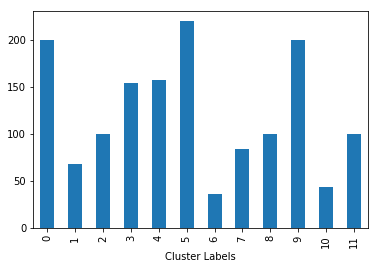

In [635]:
after_the_fact.groupby('Cluster Labels')['Venue'].count().plot(kind='bar')

Cluster0
Fairview          100
Mount Pleasant    100
Name: Neighbourhood, dtype: int64


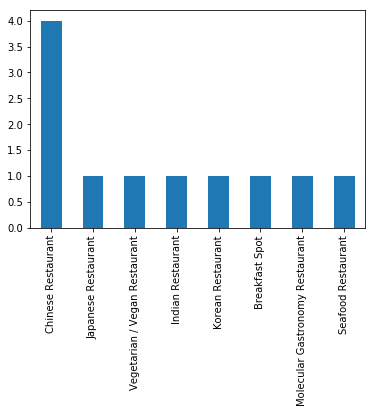

Cluster1
Oakridge         41
Arbutus-Ridge    27
Name: Neighbourhood, dtype: int64


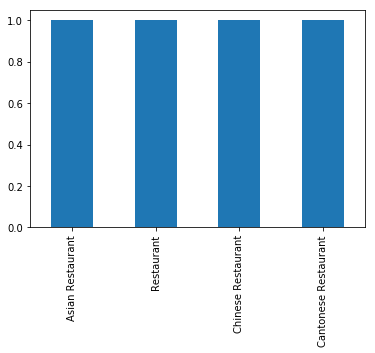

Cluster2
Kitsilano    100
Name: Neighbourhood, dtype: int64


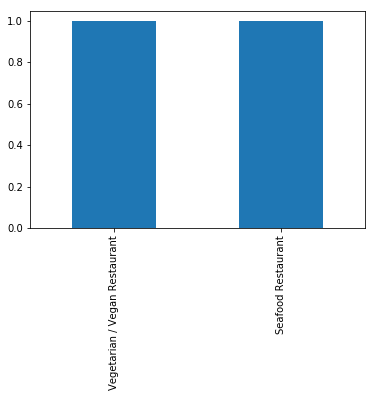

Cluster3
West Point Grey      84
Kerrisdale           43
Dunbar-Southlands    27
Name: Neighbourhood, dtype: int64


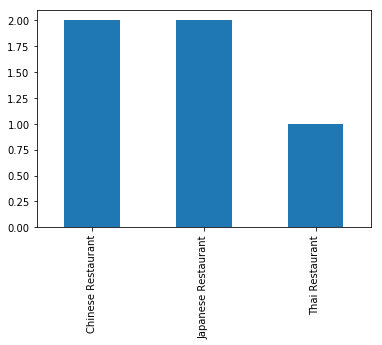

Cluster4
Riley Park    100
Marpole        57
Name: Neighbourhood, dtype: int64


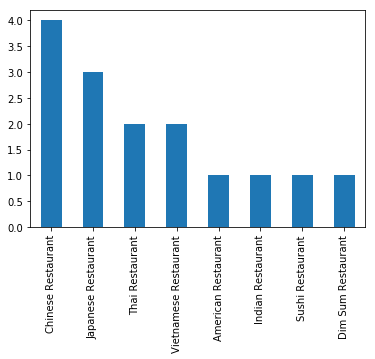

Cluster5
Renfrew-Collingwood         73
Kensington-Cedar Cottage    60
Hastings-Sunrise            60
Killarney                   27
Name: Neighbourhood, dtype: int64


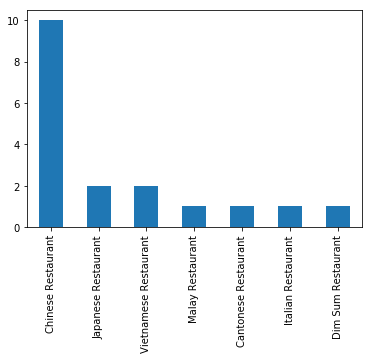

Cluster6
Shaughnessy    36
Name: Neighbourhood, dtype: int64


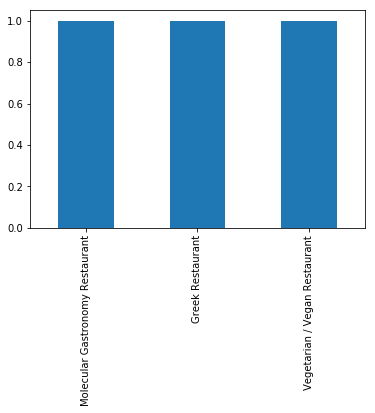

Cluster7
Sunset                 49
Victoria-Fraserview    35
Name: Neighbourhood, dtype: int64


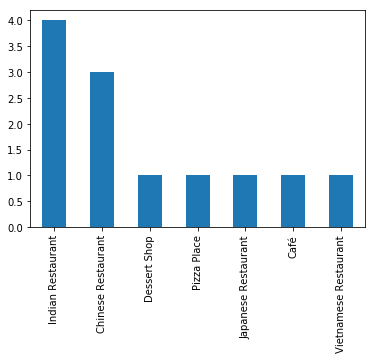

Cluster8
Downtown    100
Name: Neighbourhood, dtype: int64


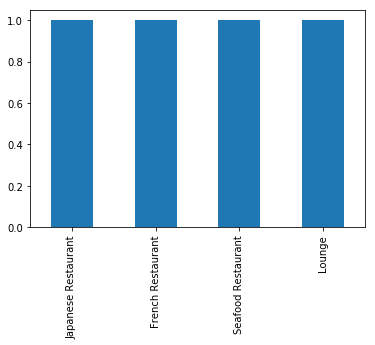

Cluster9
Grandview-Woodland    100
Strathcona            100
Name: Neighbourhood, dtype: int64


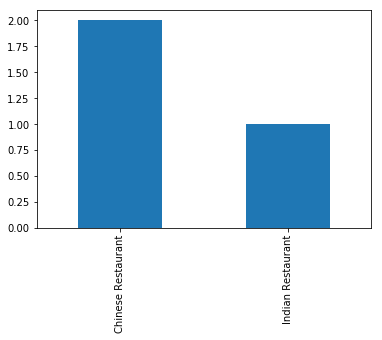

Cluster10
South Cambie    44
Name: Neighbourhood, dtype: int64


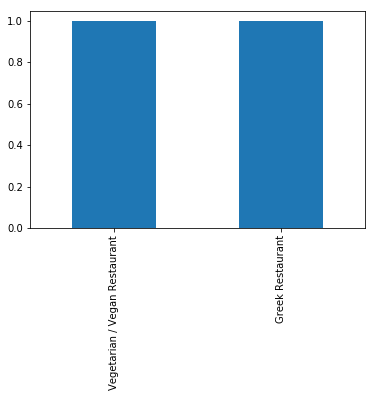

In [637]:
# Number of within Central Business District
for i in range(0,kclusters-1):
    print('Cluster' + str(i))
    cluster_two = after_the_fact[after_the_fact['Cluster Labels'] == i]
    print(cluster_two['Neighbourhood'].value_counts())
    cluster_two = cluster_two[cluster_two['Venue'].str.contains("Restaurant")]
    cluster_two['Venue Category'].value_counts().head(16).plot(kind='bar')
    plt.show()